## OUTLINE

1. Problem Description
2. Import The Libraries
3. Understanding The Dataset
4. Data Cleaning
5. EDA
6. Feature Engineering
7. Modelling

## 1. Problem Description
Our general goal is to understand the avacado sales in the US; find useful insights from the dataset that can be used by the farmers/sellers and consumers. Then be quite specific and predict what will be the buying price/Retailers selling price of a single avocado given all the features and only the month for date.

I am quite interested with this study, not just because of my love for avocados but because avacado is a farm product. Farm products's prices are highly dependent on supply and demand forces. The supply fluctuates with the seasons; having very little or even no supply during low season and alot of produce during peak seasons. If this scenario is not well managed we see food going to waste during peak seasons.

Using insights from data, proper management strategies can be developed to ensure that there is proper pricing, well distribution of produce from high peak season regions to low season regions, and food preservation of produce that the market will not consume despite the right price.

We do acknowledge that food supply chain is extremely complex, and the delivery of a single type of food such as avocado to a consumer involves many actors. However, the fact is, the end consumer buying price and and the produce determines how the inbetween will be.

Predict future prices using Random Forest

## 2. Import The Libraries
Lets start off with the basic libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

## 3. Understanding The Dataset

In [2]:
# Upload and view the dataset
data = pd.read_csv("avocado.csv")
data.head(8)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany


In [3]:
data.shape

(18249, 14)

### A brief description of the 14 columns:

1. Date - observation date,
2. Average price - avg price per pc,
3. Total Volume - Total pcs of avocados sold,
4. 4046,4225, 4770 - Bulk produce codes/labels of total pcs sold,
5. Total Bags - Total bags sold,
6. Small Bags, Large Bags, XLarge Bags- 3 different size of bags sold,
7. Type - convention or Organic type of avocados of the observation
8. Year- Year of observation. from 2015 - 2018
9. Region - The city

In [4]:
# All the regions (cities)
data.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [5]:
# The type of avocados
data.type.unique()

array(['conventional', 'organic'], dtype=object)

In [6]:
# What are the Data type and do we have some null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


No missing data, most dtypes are float. .and 3 objects

In [7]:
# do we have any duplicates, that we may need to drop
data.duplicated().sum()

0

Nope! We are good, no duplicates

In [8]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Highest price is 3.25 and lowest is 0.4 with no 0 price

## 5. Exploratary Data Analysis

Text(0, 0.5, 'Avg Price')

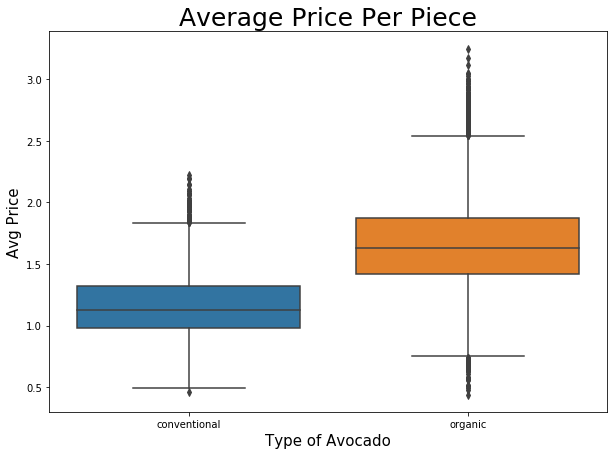

In [9]:
# compare the prices of the two types and identify any outliers

#define the plot
f,ax = plt.subplots(figsize = (10,7))

sns.boxplot(x="type", y="AveragePrice",data=data,);
plt.title("Average Price Per Piece",fontsize = 25,color='black')
plt.xlabel('Type of Avocado',fontsize = 15,color='black')
plt.ylabel('Avg Price',fontsize = 15,color='black')

The organic are generaly more expensive which is quite expected now that many people are going the organic way, hence there is a higher demand and I guess it must be more expensive to grow organic avocados. The organic seems to have outliers on both ends, which we can look into later. The conventional type has outliers on the higher side.

Text(0, 0.5, 'Avg Price')

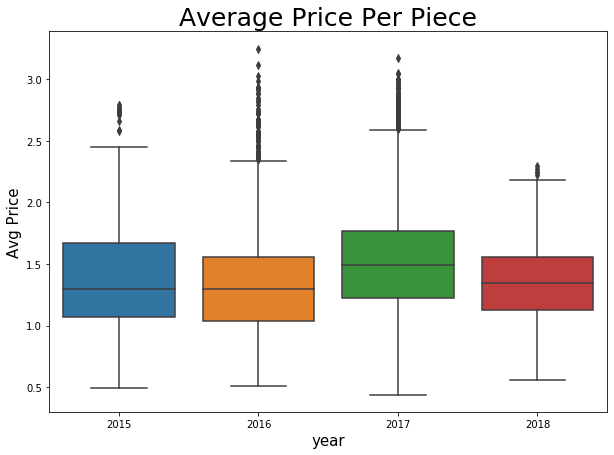

In [10]:
# compare the price over the four years and identify any outliers
f,ax = plt.subplots(figsize = (10,7))
sns.boxplot(x="year", y="AveragePrice",data=data,);
plt.title("Average Price Per Piece",fontsize = 25,color='black')
plt.xlabel('year',fontsize = 15,color='black')
plt.ylabel('Avg Price',fontsize = 15,color='black')

Seems like the mean price was generally higher in 2017

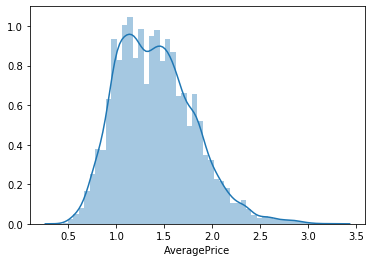

In [11]:
# plot AveragePrice distribution
sns.distplot(data['AveragePrice']);

In [12]:
# what is the relationship between the price and the rest of the features
# Is there a correlation
# Perform correlation

corr = data.corr()
corr.sort_values(["AveragePrice"], ascending = False, inplace = True)
print(corr.AveragePrice)

AveragePrice    1.000000
year            0.093197
XLarge Bags    -0.117592
Unnamed: 0     -0.133008
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64


We start learning more about price, interesting to see that there is 'less' correlation with the total volume,however look further into maybe each year.

## 6. Feature Engineering

In [13]:
data.shape


(18249, 14)

In [14]:
# convert Date from object to a datetime
import datetime as dt
data.Date= pd.to_datetime(data.Date) 
data.Date.dt.month
data["Month"]= data.Date.dt.month

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
Month           18249 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(3), object(2)
memory usage: 2.1+ MB


In [16]:
#drop unecessary features
data.drop(['Date'],axis =1,inplace=True)
data.drop(['Unnamed: 0'],axis =1,inplace=True)
data.drop(['year'],axis =1,inplace=True)

In [17]:
#get dummies for categorical data
data = pd.get_dummies(data)

In [18]:
# checking the shape at this point
data.shape

(18249, 66)

## 7. Train Model
#### Given all the features can we predict price?

In [19]:
#Define X and y value.
x=data.drop('AveragePrice',axis=1)
y=data ['AveragePrice']

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((14599, 65), (14599,), (3650, 65), (3650,))

In [21]:
#Use numpy to convert to array
x_train = np.array(x_train)
y_train = np.array(y_train)

In [22]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train);

In [23]:
#Use numpy to convert test train to an array
x_test = np.array(x_test)
y_test = np.array(y_test)

In [24]:
# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.11 degrees.


In [25]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 92.19 %.


Our model has a 92.19% accuracy in predicting the price of an avocado given its features